## 서울시, 구별 차량 등록 대수와 서울시 주차 공간 분석
***

In [1]:
#폰트설정
%%html

# 에디터의 폰트를 조정합니다.
<style type='text/css'>
.CodeMirror{
    font-size: 14px;
    font-familiy: D2Coding;
}
</style>

In [20]:
import numpy as np
import pandas as pd

import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('알 수 없는 시스템입니다.')
    
%matplotlib inline

## 데이터 정리-1 (구별 차량 등록 대수) - 8월 기준

In [21]:
car_registration = pd.read_excel('data/car_registration.xlsx', convert_float=True)
car_registration.head(28)

,기간,자치구,합계,합계.1,합계.2,합계.3,승용차,승용차.1,승용차.2,승용차.3,...,화물차.1,화물차.2,화물차.3,특수차,특수차.1,특수차.2,특수차.3,이륜차,이륜차.1,이륜차.2
0,기간,자치구,소계,관용,자가용,영업용,소계,관용,자가용,영업용,...,관용,자가용,영업용,소계,관용,자가용,영업용,소계,관용,자가용
1,2020.08,서울시,3148071,12687,2930951,204433,2699801,4510,2569281,126010,...,4052,268623,57826,8719,358,3389,4972,455459,4529,450930
2,2020.08,종로구,50116,3828,44578,1710,40953,1629,38837,487,...,411,3909,858,189,87,47,55,13219,424,12795
3,2020.08,중구,51034,1270,45750,4014,40637,283,38462,1892,...,194,5019,1686,233,16,93,124,14592,242,14350
4,2020.08,용산구,77230,350,75054,1826,67984,138,67206,640,...,148,5557,1078,119,9,73,37,16475,203,16272
5,2020.08,성동구,105282,350,93534,11398,90819,120,82060,8639,...,167,8862,1609,204,18,86,100,20066,110,19956
6,2020.08,광진구,98934,293,93049,5592,83151,85,79659,3407,...,161,10610,1537,285,6,46,233,18621,189,18432
7,2020.08,동대문구,98340,306,92788,5246,82013,106,79044,2863,...,138,10346,2163,198,10,90,98,23879,189,23690
8,2020.08,중랑구,113569,255,103715,9599,93452,79,87465,5908,...,126,12245,2730,462,16,120,326,24514,115,24399
9,2020.08,성북구,120152,291,114406,5455,104195,89,101554,2552,...,148,9105,1657,192,8,87,97,26640,229,26411


In [13]:
# 데이터를 사용하기 위해 필요없는 행을 지워준다.
car_registration.drop([0], inplace=True)
car_registration.drop([1], inplace=True)
car_registration

,기간,자치구,합계,합계.1,합계.2,합계.3,승용차,승용차.1,승용차.2,승용차.3,...,화물차.1,화물차.2,화물차.3,특수차,특수차.1,특수차.2,특수차.3,이륜차,이륜차.1,이륜차.2
1,2020.08,서울시,3148071,12687,2930951,204433,2699801,4510,2569281,126010,...,4052,268623,57826,8719,358,3389,4972,455459,4529,450930
2,2020.08,종로구,50116,3828,44578,1710,40953,1629,38837,487,...,411,3909,858,189,87,47,55,13219,424,12795
3,2020.08,중구,51034,1270,45750,4014,40637,283,38462,1892,...,194,5019,1686,233,16,93,124,14592,242,14350
4,2020.08,용산구,77230,350,75054,1826,67984,138,67206,640,...,148,5557,1078,119,9,73,37,16475,203,16272
5,2020.08,성동구,105282,350,93534,11398,90819,120,82060,8639,...,167,8862,1609,204,18,86,100,20066,110,19956
6,2020.08,광진구,98934,293,93049,5592,83151,85,79659,3407,...,161,10610,1537,285,6,46,233,18621,189,18432
7,2020.08,동대문구,98340,306,92788,5246,82013,106,79044,2863,...,138,10346,2163,198,10,90,98,23879,189,23690
8,2020.08,중랑구,113569,255,103715,9599,93452,79,87465,5908,...,126,12245,2730,462,16,120,326,24514,115,24399
9,2020.08,성북구,120152,291,114406,5455,104195,89,101554,2552,...,148,9105,1657,192,8,87,97,26640,229,26411
10,2020.08,강북구,76006,327,71325,4354,63200,106,60825,2269,...,145,7604,1257,174,13,59,102,22158,61,22097


In [22]:
# 피벗을 이용하여 자치구를 인덱스로 만든다.
car_registration = pd.pivot_table(car_registration, index='자치구', aggfunc=np.sum)
car_registration.head()

,기간,승용차,승용차.1,승용차.2,승용차.3,승합차,승합차.1,승합차.2,승합차.3,이륜차,...,특수차.2,특수차.3,합계,합계.1,합계.2,합계.3,화물차,화물차.1,화물차.2,화물차.3
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,2020.08,213545,152,197441,15952,5580,53,4851,676,17665,...,230,163,235309,399,215949,18961,15775,178,13427,2170
강동구,2020.08,128046,92,122226,5728,4482,41,3878,563,17050,...,94,229,148234,292,139021,8921,15378,154,12823,2401
강북구,2020.08,63200,106,60825,2269,3626,63,2837,726,22158,...,59,102,76006,327,71325,4354,9006,145,7604,1257
강서구,2020.08,175818,120,162243,13455,7268,47,5741,1480,19053,...,209,249,204549,349,185166,19034,20990,167,16973,3850
관악구,2020.08,103283,98,100060,3125,4377,45,4023,309,24945,...,95,169,120077,317,114142,5618,12142,163,9964,2015


In [37]:
# 컬럼 확인하기
car_registration.columns.tolist()

['기간',
 '승용차',
 '승용차.1',
 '승용차.2',
 '승용차.3',
 '승합차',
 '승합차.1',
 '승합차.2',
 '승합차.3',
 '이륜차',
 '이륜차.1',
 '이륜차.2',
 '특수차',
 '특수차.1',
 '특수차.2',
 '특수차.3',
 '합계',
 '합계.1',
 '합계.2',
 '합계.3',
 '화물차',
 '화물차.1',
 '화물차.2',
 '화물차.3']

In [43]:
print(car_registration['승용차'][0])
print(car_registration['승용차.1'][0] + car_registration['승용차.2'][0] + car_registration['승용차.3'][0])
print(car_registration['승용차'][0] + car_registration['승합차'][0] + car_registration['이륜차'][0] + car_registration['특수차'][0] + car_registration['화물차'][0])
print(car_registration['합계'][0] + car_registration['이륜차'][0])
print(car_registration['화물차'][0])

213545
213545
252974
252974
15775


각 데이터 열의 의미 파악하기 -> 합계는 이륜차를 제외한 모든 차량 대수의 합계를 의미한다.

In [56]:
# 필요없는 컬럼(피처)을 지워준다.
# for column in car_registration.columns.tolist():
#     if car_registration['합계']

del car_registration['기간']
del car_registration['승용차.1']
del car_registration['승용차.2']
del car_registration['승용차.3']
del car_registration['승합차.1']
del car_registration['승합차.2']
del car_registration['승합차.3']
del car_registration['이륜차.1']
del car_registration['이륜차.2']
del car_registration['특수차.1']
del car_registration['특수차.2']
del car_registration['특수차.3']
del car_registration['합계.1']
del car_registration['합계.2']
del car_registration['합계.3']
del car_registration['화물차.1']
del car_registration['화물차.2']
del car_registration['화물차.3']

In [57]:
car_registration

,승용차,승합차,이륜차,특수차,합계,화물차
자치구,,,,,,
강남구,213545,5580,17665,409,235309,15775
강동구,128046,4482,17050,328,148234,15378
강북구,63200,3626,22158,174,76006,9006
강서구,175818,7268,19053,473,204549,20990
관악구,103283,4377,24945,275,120077,12142
광진구,83151,3190,18621,285,98934,12308
구로구,121477,5911,15840,398,145025,17239
금천구,70958,3983,11774,176,88297,13180
기타,-,-,12,-,-,-


In [58]:
car_registration.drop(['기타'], inplace=True)

In [59]:
car_registration

,승용차,승합차,이륜차,특수차,합계,화물차
자치구,,,,,,
강남구,213545,5580,17665,409,235309,15775
강동구,128046,4482,17050,328,148234,15378
강북구,63200,3626,22158,174,76006,9006
강서구,175818,7268,19053,473,204549,20990
관악구,103283,4377,24945,275,120077,12142
광진구,83151,3190,18621,285,98934,12308
구로구,121477,5911,15840,398,145025,17239
금천구,70958,3983,11774,176,88297,13180
노원구,134045,5265,15054,367,152795,13118


## 데이터 정리-2 (서울시 주차 공간)

In [81]:
parking_lot = pd.read_excel('data/parking_lot.xlsx', convert_float=True)
parking_lot.head(28)

,기간,자치구,합계,합계.1,합계.2,합계.3,합계.4,합계.5,노상,노상.1,...,노외.6,노외.7,건축물부설,건축물부설.1,건축물부설.2,건축물부설.3,건축물부설.4,건축물부설.5,건축물부설.6,건축물부설.7
0,기간,자치구,계,계,공영,공영,민영,민영,계,계,...,민영,민영,계,계,일반주택,일반주택,공동주택,공동주택,일반건축물,일반건축물
1,기간,자치구,개소,면수,개소,면수,개소,면수,개소,면수,...,개소,면수,개소,면수,개소,면수,개소,면수,개소,면수
2,2019,서울시,314392,4250682,11083,187446,303309,4063236,9859,115692,...,850,29019,302459,4034217,128636,326562,81575,2118106,92248,1589549
3,2019,종로구,7103,95350,194,6142,6909,89208,151,2187,...,67,2590,6842,86618,2835,7170,1507,25236,2500,54212
4,2019,중구,4228,107399,178,5408,4050,101991,146,1493,...,42,1836,4008,100155,866,2320,706,28246,2436,69589
5,2019,용산구,7390,113591,424,6532,6966,107059,380,3609,...,24,448,6942,106611,2710,6694,2047,60428,2185,39489
6,2019,성동구,6649,133724,287,8174,6362,125550,254,5660,...,39,1213,6323,124337,2813,5658,817,62956,2693,55723
7,2019,광진구,17495,138741,1350,5619,16145,133122,1278,3311,...,23,367,16122,132755,7891,22964,3506,56434,4725,53357
8,2019,동대문구,10455,138200,685,6026,9770,132174,655,4254,...,19,859,9751,131315,4290,9545,1753,74249,3708,47521
9,2019,중랑구,12381,133615,562,11119,11819,122496,523,6866,...,28,1285,11791,121211,5944,15289,3095,74057,2752,31865


##### 데이터 설명
1) 공영주차장 합계=노상주차장+노외주차장(시영,구영), 민영주차장 합계=노외주차장(민영)+건축물부설주차장

2) 노상주차장에 거주자우선 주차장 포함 (2007년부터)

In [82]:
# 데이터를 사용하기 위해 필요없는 행을 지워준다.
parking_lot.drop([0], inplace=True)
parking_lot.drop([1], inplace=True)
parking_lot.drop([2], inplace=True)

parking_lot.head()

,기간,자치구,합계,합계.1,합계.2,합계.3,합계.4,합계.5,노상,노상.1,...,노외.6,노외.7,건축물부설,건축물부설.1,건축물부설.2,건축물부설.3,건축물부설.4,건축물부설.5,건축물부설.6,건축물부설.7
3,2019,종로구,7103,95350,194,6142,6909,89208,151,2187,...,67,2590,6842,86618,2835,7170,1507,25236,2500,54212
4,2019,중구,4228,107399,178,5408,4050,101991,146,1493,...,42,1836,4008,100155,866,2320,706,28246,2436,69589
5,2019,용산구,7390,113591,424,6532,6966,107059,380,3609,...,24,448,6942,106611,2710,6694,2047,60428,2185,39489
6,2019,성동구,6649,133724,287,8174,6362,125550,254,5660,...,39,1213,6323,124337,2813,5658,817,62956,2693,55723
7,2019,광진구,17495,138741,1350,5619,16145,133122,1278,3311,...,23,367,16122,132755,7891,22964,3506,56434,4725,53357


In [83]:
# 피벗을 이용해 자치구를 인덱스로 만든다.
parking_lot = pd.pivot_table(parking_lot, index='자치구', aggfunc=np.sum)
parking_lot.head()

,건축물부설,건축물부설.1,건축물부설.2,건축물부설.3,건축물부설.4,건축물부설.5,건축물부설.6,건축물부설.7,기간,노상,...,노외.4,노외.5,노외.6,노외.7,합계,합계.1,합계.2,합계.3,합계.4,합계.5
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,19628,378647,6410,38123,3720,133861,9498,206663,2019,64,...,33,5001,98,3448,19829,395951,103,13856,19726,382095
강동구,19937,181527,7516,15920,3688,97284,8733,68323,2019,21,...,22,1785,12,389,19994,193311,45,11395,19949,181916
강북구,10900,85637,5448,11208,3382,55007,2070,19422,2019,23,...,26,2090,20,442,10969,91187,49,5108,10920,86079
강서구,18265,252202,7042,14887,7032,141073,4191,96242,2019,641,...,22,2345,24,1410,18962,262157,673,8545,18289,253612
관악구,20326,143536,10682,23376,4595,78974,5049,41186,2019,30,...,33,1875,51,1079,20442,152131,65,7516,20377,144615


In [84]:
parking_lot.columns.tolist()
# 면수 : 면적 , 개소 : 주차장 개수
# 합계 -> 개소 합계
# 합계1-> 면수 합계
# 합계2-> 공영 개소 합계
# 합계3-> 공영 면수 합계
# 합계4-> 민영 개소 합계
# 합계5 -> 민영 면수 합계

['건축물부설',
 '건축물부설.1',
 '건축물부설.2',
 '건축물부설.3',
 '건축물부설.4',
 '건축물부설.5',
 '건축물부설.6',
 '건축물부설.7',
 '기간',
 '노상',
 '노상.1',
 '노상.2',
 '노상.3',
 '노상.4',
 '노상.5',
 '노외',
 '노외.1',
 '노외.2',
 '노외.3',
 '노외.4',
 '노외.5',
 '노외.6',
 '노외.7',
 '합계',
 '합계.1',
 '합계.2',
 '합계.3',
 '합계.4',
 '합계.5']

In [85]:
# 필요없는 컬럼을 지워준다.
del parking_lot['건축물부설.2']
del parking_lot['건축물부설.3']
del parking_lot['건축물부설.4']
del parking_lot['건축물부설.5']
del parking_lot['건축물부설.6']
del parking_lot['건축물부설.7']
del parking_lot['기간']
del parking_lot['노상.2']
del parking_lot['노상.3']
del parking_lot['노상.4']
del parking_lot['노상.5']
del parking_lot['노외.2']
del parking_lot['노외.3']
del parking_lot['노외.4']
del parking_lot['노외.5']
del parking_lot['노외.6']
del parking_lot['노외.7']

In [87]:
parking_lot.rename(columns = {'건축물부설' : '건축물부설(개소)'}, inplace = True)
parking_lot.rename(columns = {'건축물부설.1' : '건축물부설(면적)'}, inplace = True)
parking_lot.rename(columns = {'노상' : '노상(개소)'}, inplace = True)
parking_lot.rename(columns = {'노상.1' : '노상(면적)'}, inplace = True)
parking_lot.rename(columns = {'노외' : '노외(개소)'}, inplace = True)
parking_lot.rename(columns = {'노외.1' : '노외(면적)'}, inplace = True)
parking_lot.rename(columns = {'합계' : '개소합계'}, inplace = True)
parking_lot.rename(columns = {'합계.1' : '면적합계'}, inplace = True)
parking_lot.rename(columns = {'합계.2' : '공영개소합계'}, inplace = True)
parking_lot.rename(columns = {'합계.3' : '공영면적합계'}, inplace = True)
parking_lot.rename(columns = {'합계.4' : '민영개소합계'}, inplace = True)
parking_lot.rename(columns = {'합계.5' : '민영면적합계'}, inplace = True)

In [88]:
parking_lot

,건축물부설(개소),건축물부설(면적),노상(개소),노상(면적),노외(개소),노외(면적),개소합계,면적합계,공영개소합계,공영면적합계,민영개소합계,민영면적합계
자치구,,,,,,,,,,,,
강남구,19628,378647,64,7906,137,9398,19829,395951,103,13856,19726,382095
강동구,19937,181527,21,8163,36,3621,19994,193311,45,11395,19949,181916
강북구,10900,85637,23,3018,46,2532,10969,91187,49,5108,10920,86079
강서구,18265,252202,641,4858,56,5097,18962,262157,673,8545,18289,253612
관악구,20326,143536,30,5548,86,3047,20442,152131,65,7516,20377,144615
광진구,16122,132755,1278,3311,95,2675,17495,138741,1350,5619,16145,133122
구로구,10254,177689,318,3056,60,3151,10632,183896,344,5343,10288,178553
금천구,9069,125097,31,2449,49,1909,9149,129455,68,4018,9081,125437
노원구,6652,172068,143,2286,60,2275,6855,176629,187,3986,6668,172643


### 데이터 병합하기 (car_registration,parking_lot)

월별 차량 등록 대수와, 주차 공간 데이터를 병합해준다.

In [94]:
# 차량합계의 데이터만 합쳐준다.
car_registration.rename(columns = {'합계' : '차량합계'}, inplace = True)

data_result = pd.merge(car_registration[['차량합계']], parking_lot, on ='자치구')
data_result.head()

,차량합계,건축물부설(개소),건축물부설(면적),노상(개소),노상(면적),노외(개소),노외(면적),개소합계,면적합계,공영개소합계,공영면적합계,민영개소합계,민영면적합계
자치구,,,,,,,,,,,,,
강남구,235309,19628,378647,64,7906,137,9398,19829,395951,103,13856,19726,382095
강동구,148234,19937,181527,21,8163,36,3621,19994,193311,45,11395,19949,181916
강북구,76006,10900,85637,23,3018,46,2532,10969,91187,49,5108,10920,86079
강서구,204549,18265,252202,641,4858,56,5097,18962,262157,673,8545,18289,253612
관악구,120077,20326,143536,30,5548,86,3047,20442,152131,65,7516,20377,144615


## 데이터 표현을 위해 다듬기

In [99]:
data_result.head()

,차량합계,건축물부설(개소),건축물부설(면적),노상(개소),노상(면적),노외(개소),노외(면적),개소합계,면적합계,공영개소합계,공영면적합계,민영개소합계,민영면적합계
자치구,,,,,,,,,,,,,
강남구,235309,19628,378647,64,7906,137,9398,19829,395951,103,13856,19726,382095
강동구,148234,19937,181527,21,8163,36,3621,19994,193311,45,11395,19949,181916
강북구,76006,10900,85637,23,3018,46,2532,10969,91187,49,5108,10920,86079
강서구,204549,18265,252202,641,4858,56,5097,18962,262157,673,8545,18289,253612
관악구,120077,20326,143536,30,5548,86,3047,20442,152131,65,7516,20377,144615


In [104]:
# 필요없는 열을 다시 제거해준다. (필요한 열만 넣어준다.)
# 편의를 위해 개소합계 끼리 뭉쳐주고, 면적합계끼리 뭉쳐준다.
data_result = data_result[['차량합계', '개소합계', '공영개소합계', '민영개소합계', '면적합계', '공영면적합계', '민영면적합계']]

In [103]:
data_result.head()

,차량합계,개소합계,공영개소합계,민영개소합계,면적합계,공영면적합계,민영면적합계
자치구,,,,,,,
강남구,235309,19829,103,19726,395951,13856,382095
강동구,148234,19994,45,19949,193311,11395,181916
강북구,76006,10969,49,10920,91187,5108,86079
강서구,204549,18962,673,18289,262157,8545,253612
관악구,120077,20442,65,20377,152131,7516,144615


In [121]:
# 정규화를 시켜준다. (컬럼별로 정규화를 시켜줌)
# 컬럼별 제일 큰 값을 1로 만들어 주고 나머지를 상대적 수치로 넣어준다.

from sklearn import preprocessing

col = ['차량합계', '개소합계', '공영개소합계', '민영개소합계', '면적합계', '공영면적합계', '민영면적합계']

x = data_result[col].values
min_max_scater = preprocessing.MinMaxScaler()

x_scaled = min_max_scater.fit_transform(x.astype(float))
data_result_norm = pd.DataFrame(x_scaled, columns=col, index = data_result.index)

data_result_norm

,차량합계,개소합계,공영개소합계,민영개소합계,면적합계,공영면적합계,민영면적합계
자치구,,,,,,,
강남구,0.954013,0.846868,0.027128,0.875021,1.000000,0.651365,1.000000
강동구,0.505450,0.855825,0.000000,0.887469,0.335092,0.494022,0.323756
강북구,0.133371,0.365921,0.001871,0.383478,0.000000,0.092066,0.000000
강서구,0.795554,0.799805,0.293732,0.794809,0.560991,0.311809,0.565959
관악구,0.360401,0.880143,0.009355,0.911359,0.199971,0.246020,0.197746
광진구,0.251484,0.720172,0.610384,0.675133,0.156035,0.124736,0.158920
구로구,0.488919,0.347628,0.139850,0.348200,0.304199,0.107090,0.312395
금천구,0.196688,0.267126,0.010758,0.280826,0.125566,0.022377,0.132959
노원구,0.528946,0.142601,0.066417,0.146135,0.280355,0.020331,0.292430


In [125]:
data_result_norm

,차량합계,개소합계,공영개소합계,민영개소합계,면적합계,공영면적합계,민영면적합계
자치구,,,,,,,
강남구,0.954013,0.846868,0.027128,0.875021,1.000000,0.651365,1.000000
강동구,0.505450,0.855825,0.000000,0.887469,0.335092,0.494022,0.323756
강북구,0.133371,0.365921,0.001871,0.383478,0.000000,0.092066,0.000000
강서구,0.795554,0.799805,0.293732,0.794809,0.560991,0.311809,0.565959
관악구,0.360401,0.880143,0.009355,0.911359,0.199971,0.246020,0.197746
광진구,0.251484,0.720172,0.610384,0.675133,0.156035,0.124736,0.158920
구로구,0.488919,0.347628,0.139850,0.348200,0.304199,0.107090,0.312395
금천구,0.196688,0.267126,0.010758,0.280826,0.125566,0.022377,0.132959
노원구,0.528946,0.142601,0.066417,0.146135,0.280355,0.020331,0.292430


## 시각화

시각화 도구인 Seaborn을 이용

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

pairplot으로 상관 관계도를 그래프로 그려본다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


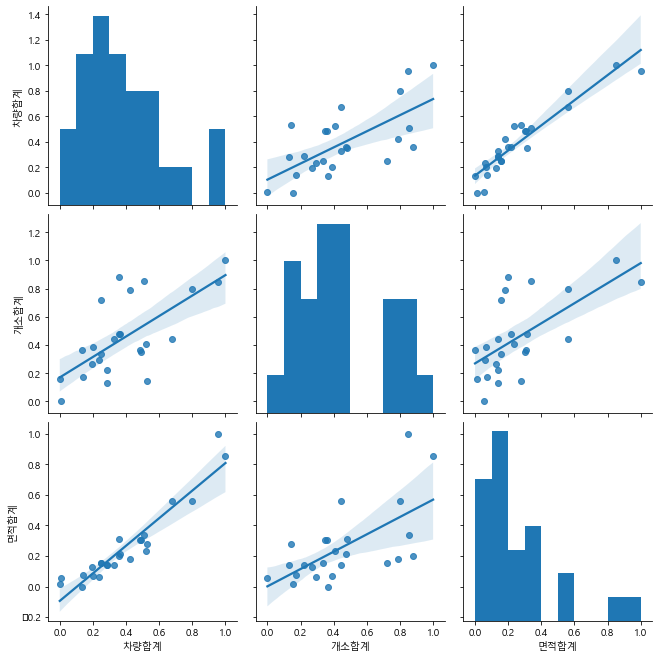

In [126]:
sns.pairplot(data_result_norm, vars=['차량합계', '개소합계', '면적합계'], kind='reg', height=3)
plt.show()

차량합계와 주차 면적합계가 큰 양의 상관관계가 있음을 알 수 있다.

In [129]:
data_result_norm.head()

,차량합계,개소합계,공영개소합계,민영개소합계,면적합계,공영면적합계,민영면적합계
자치구,,,,,,,
강남구,0.954013,0.846868,0.027128,0.875021,1.000000,0.651365,1.000000
강동구,0.505450,0.855825,0.000000,0.887469,0.335092,0.494022,0.323756
강북구,0.133371,0.365921,0.001871,0.383478,0.000000,0.092066,0.000000
강서구,0.795554,0.799805,0.293732,0.794809,0.560991,0.311809,0.565959
관악구,0.360401,0.880143,0.009355,0.911359,0.199971,0.246020,0.197746


In [143]:
# 차량합계와 면적합계의 상관관계를 분석해본다.

import numpy as np

car_total = np.array(data_result['차량합계'], dtype = int)
area_total = np.array(data_result['면적합계'], dtype = int)

np.corrcoef(car_total, area_total)

array([[1.        , 0.94303294],
       [0.94303294, 1.        ]])

굉장히 강한 양의 상관관계가 있다.

In [144]:
fp1 = np.polyfit(car_total, area_total, 1)
fp1

array([ 1.41859735e+00, -8.60652774e+03])

In [151]:
f1 = np.poly1d(fp1)
fx = np.linspace(20000, 300000, 100)

numpy의 polyfit 명령으로 직선을 그릴 수 있다. 이를 그리기 위해 x축과 y축 데이터를 얻어야 한다. x축 데이터는 numpy의 linspace로 만들고, y축은 poly1d로 만들 수 있다.

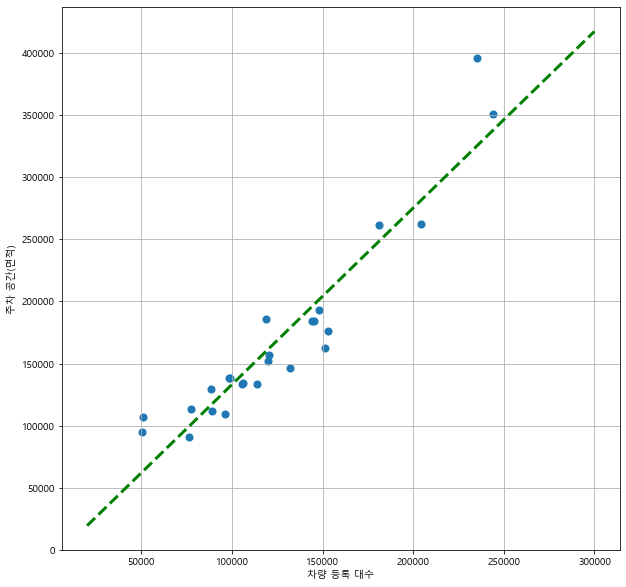

In [161]:
plt.figure(figsize=(10,10))
plt.scatter(car_total, area_total, s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('차량 등록 대수')
plt.ylabel('주차 공간(면적)')
plt.grid()
plt.show()

하나의 직선이 이 전체 데이터를 대표하는 역할을 한다면, 차량 등록 대수가 150000대 일 때는 주차 공간이 210000(m^2)정도 늘어나야 한다는 것을 알 수 있다.

그 경향에서 멀어지는 자치구 이름을 나타나도록 하고 멀어질수록 다른 색이 나타 나도록 해 보자.

오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬하여 저장한다.

In [162]:
data_result['오차'] = np.abs(data_result['면적합계'] - f1(data_result['차량합계']))
fp1=np.polyfit(car_total, area_total, 1)

f1 = np.poly1d(fp1)
fx = np.linspace(20000, 300000, 100)

df_sort = data_result.sort_values(by='오차', ascending = False)
df_sort.head()

,차량합계,개소합계,공영개소합계,민영개소합계,면적합계,공영면적합계,민영면적합계,오차
자치구,,,,,,,,
강남구,235309,19829,103,19726,395951,13856,382095,70748.8
중구,51034,4228,178,4050,107399,5408,101991,43608.8
양천구,151566,11694,517,11177,162797,7206,155591,43607.6
종로구,50116,7103,194,6909,95350,6142,89208,32862.1
은평구,131966,18790,134,18656,146696,5721,140975,31904.1


In [159]:
df_sort

,차량합계,개소합계,공영개소합계,민영개소합계,면적합계,공영면적합계,민영면적합계,오차
자치구,,,,,,,,
강남구,235309,19829,103,19726,395951,13856,382095,70748.8
중구,51034,4228,178,4050,107399,5408,101991,43608.8
양천구,151566,11694,517,11177,162797,7206,155591,43607.6
종로구,50116,7103,194,6909,95350,6142,89208,32862.1
은평구,131966,18790,134,18656,146696,5721,140975,31904.1
노원구,152795,6855,187,6668,176629,3986,172643,31519.1
마포구,119014,13066,48,13018,186203,7139,179064,25976.6
강서구,204549,18962,673,18289,262157,8545,253612,19409.1
중랑구,113569,12381,562,11819,133615,11119,122496,18887.2


그래프에 텍스트와 color map을 입힌다.

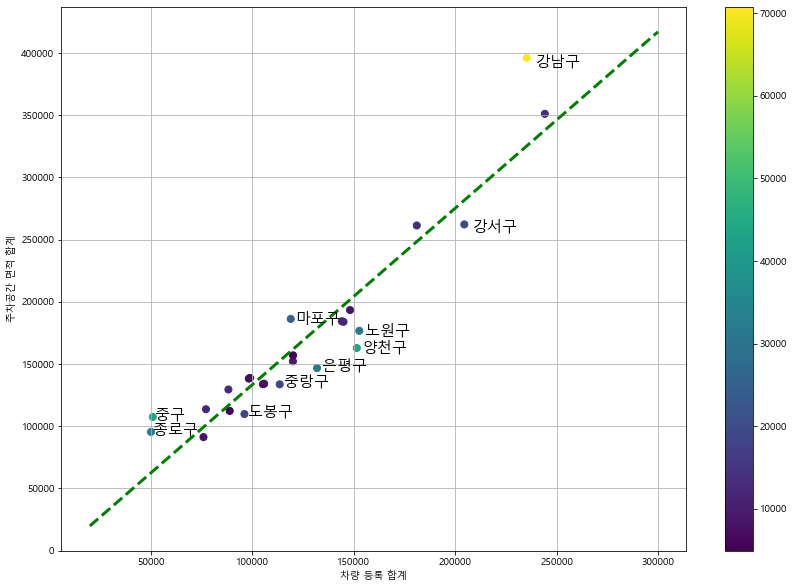

In [163]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['차량합계'], data_result['면적합계'],
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 자치구 이름 표시 개수
for n in range(10):
    plt.text(df_sort['차량합계'][n]*1.02, df_sort['면적합계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('차량 등록 합계')
plt.ylabel('주차공간 면적 합계')
plt.colorbar()
plt.grid()
plt.show()

선을 기준으로 강남구가 전체 지역의 일반적인 경향보다 주차 공간이 많다는 것을 알 수 있다.